In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
df=pd.read_csv("C:\\Users\\vivsw\\Downloads\\disaster_tweets_data.csv",encoding='latin1')
print("Shape of the dataframe: ",df.shape)
df.isna().sum()
df.head()

Shape of the dataframe:  (7613, 2)


,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [3]:
def data_process(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [4]:
df.tweets=df['tweets'].apply(data_process)

In [5]:
df=df.drop_duplicates('tweets')

In [6]:
df.head()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [7]:
df.dropna()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7603,officials say quarantine place alabama home po...,1
7605,flip side im walmart bomb everyone evacuate st...,1
7606,suicide bomber kills 15 saudi security site mo...,1
7608,two giant cranes holding bridge collapse nearb...,1


In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(data):
    if isinstance(data, str) and data.strip() != "":
        words = word_tokenize(data)
        text = [stemmer.stem(word) for word in words]
        return " ".join(text)
    else:
        return ""

In [9]:
df['tweets'] = df['tweets'].apply(stemming)

In [10]:
df.head()

,tweets,target
0,deed reason earthquak may allah forgiv us,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,13000 peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1


<Axes: xlabel='target', ylabel='count'>

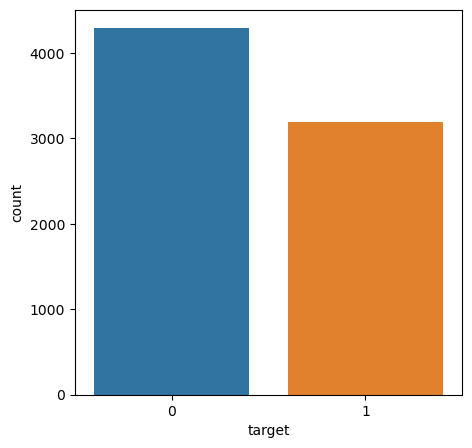

In [11]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='target', data = df)

In [12]:
df.dtypes

tweets    object
target     int64
dtype: object

In [13]:
pos_tweets = df[df.target == 1]
pos_tweets.head()

,tweets,target
0,deed reason earthquak may allah forgiv us,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,13000 peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1


In [14]:
neg_tweets = df[df.target == 0]
neg_tweets.head()

,tweets,target
15,what man,0
16,love fruit,0
17,summer love,0
18,car fast,0
19,goooooooaaaaaal,0


In [15]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['tweets'])

In [16]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 70797

First 20 features:
 ['0011' '0011 utc' '001116' '001116 utc20150805' '0025' '0025 updat'
 '005225' '005225 utc20150805' '010156' '010156 okinawa' '010217'
 '010217 okinawa' '0104' '0104 utc' '0104 utc5km' '010401'
 '010401 utc20150805' '0106' '0106 bmw' '0111']


In [17]:
X = df['tweets']
Y = df['target']
X = vect.transform(X)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
accuracy={}

In [21]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))

# Multinomial Naïve Bayes Classification

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
parameters={
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mnb_model=GridSearchCV(mnb,param_grid=parameters,cv=cv)
mnb_model.fit(x_train,y_train)
print("Best :%f using %s" %(mnb_model.best_score_,mnb_model.best_params_))

Best :0.791800 using {'alpha': 1.0, 'fit_prior': True}


In [23]:
best_mnb= mnb_model.best_estimator_
ypred_mnb=best_mnb.predict(x_test)
mnb_acc=accuracy_score(ypred_mnb,y_test)
print("Accuracy of mnb is", mnb_acc)
accuracy['MNB']=mnb_acc
mnb_pre=precision_score(ypred_mnb,y_test)
print("Precision of mnb is", mnb_pre)
mnb_recall=recall_score(ypred_mnb,y_test)
print("Recall of mnb is", mnb_recall)
mnb_f1=f1_score(ypred_mnb,y_test)
print("F1 score of mnb is", mnb_f1)
eval_model(y_test,ypred_mnb)
mscore(best_mnb)

Accuracy of mnb is 0.7946524064171123
Precision of mnb is 0.7291925465838509
Recall of mnb is 0.7795484727755644
F1 score of mnb is 0.7535301668806161
[[899 166]
 [218 587]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1065
           1       0.78      0.73      0.75       805

    accuracy                           0.79      1870
   macro avg       0.79      0.79      0.79      1870
weighted avg       0.79      0.79      0.79      1870

Train Score 0.9743315508021391
Test Score 0.7946524064171123


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000, tol=0.0001)
parameters={
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_model=GridSearchCV(lr,param_grid=parameters,cv=cv)
lr_model.fit(x_train,y_train)
print("Best :%f using %s" %(lr_model.best_score_,lr_model.best_params_))

Best :0.801248 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [25]:
best_lr= lr_model.best_estimator_
ypred_lr=best_lr.predict(x_test)
lr_acc=accuracy_score(ypred_lr,y_test)
print("Accuracy of logsitic regression is", lr_acc)
accuracy['Logistic Regression']=lr_acc
lr_pre=precision_score(ypred_lr,y_test)
print("Precision of logsitic regression is", lr_pre)
lr_recall=recall_score(ypred_lr,y_test)
print("Recall of logsitic regression is", lr_recall)
lr_f1=f1_score(ypred_lr,y_test)
print("F1 score of logsitic regression is", lr_f1)
eval_model(y_test,ypred_lr)
mscore(best_lr)

Accuracy of logsitic regression is 0.7962566844919786
Precision of logsitic regression is 0.6559006211180124
Recall of logsitic regression is 0.8354430379746836
F1 score of logsitic regression is 0.7348643006263047
[[961 104]
 [277 528]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1065
           1       0.84      0.66      0.73       805

    accuracy                           0.80      1870
   macro avg       0.81      0.78      0.78      1870
weighted avg       0.80      0.80      0.79      1870

Train Score 0.9957219251336898
Test Score 0.7962566844919786


# KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan','cosine']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_model=GridSearchCV(knn,param_grid=parameters,cv=cv)
knn_model.fit(x_train,y_train)
print("Best :%f using %s" %(knn_model.best_score_,knn_model.best_params_))

Best :0.772193 using {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}


In [27]:
best_knn= knn_model.best_estimator_
ypred_knn=best_knn.predict(x_test)
knn_acc=accuracy_score(ypred_knn,y_test)
print("Accuracy of KNN is", knn_acc)
accuracy['KNN']=knn_acc
knn_pre=precision_score(ypred_knn,y_test)
print("Precision of KNN is", knn_pre)
knn_recall=recall_score(ypred_knn,y_test)
print("Recall of KNN is", knn_recall)
knn_f1=f1_score(ypred_knn,y_test)
print("F1 score of KNN is", knn_f1)
eval_model(y_test,ypred_knn)
mscore(best_knn)

Accuracy of KNN is 0.7695187165775401
Precision of KNN is 0.622360248447205
Recall of KNN is 0.7977707006369427
F1 score of KNN is 0.6992323796231682
[[938 127]
 [304 501]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1065
           1       0.80      0.62      0.70       805

    accuracy                           0.77      1870
   macro avg       0.78      0.75      0.76      1870
weighted avg       0.77      0.77      0.76      1870

Train Score 0.9998217468805705
Test Score 0.7695187165775401


# SVM

In [28]:
from sklearn.svm import SVC
svc=SVC()
parameters={ 'kernel':['linear','rbf','sigmoid'],
            'C':[0.1, 0.5, 1, 5],
            'gamma':[0.0001, 0.001, 0.01, 0.1],
           }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf=GridSearchCV(svc,param_grid=parameters,cv=cv)
clf.fit(x_train,y_train)
print("Best :%f using %s" %(clf.best_score_,clf.best_params_))

Best :0.801961 using {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [29]:
best_svc= clf.best_estimator_
ypred_svc=best_svc.predict(x_test)
svc_acc=accuracy_score(ypred_svc,y_test)
print("Accuracy of svm is", svc_acc)
accuracy['SVM']=svc_acc
svc_pre=precision_score(ypred_svc,y_test)
print("Precision of svm is", svc_pre)
svc_recall=recall_score(ypred_svc,y_test)
print("Recall of svm is", svc_recall)
svc_f1=f1_score(ypred_svc,y_test)
print("F1 score of svm is", svc_f1)
eval_model(y_test,ypred_svc)
mscore(best_svc)

Accuracy of svm is 0.7957219251336899
Precision of svm is 0.6447204968944099
Recall of svm is 0.8439024390243902
F1 score of svm is 0.7309859154929578
[[969  96]
 [286 519]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1065
           1       0.84      0.64      0.73       805

    accuracy                           0.80      1870
   macro avg       0.81      0.78      0.78      1870
weighted avg       0.80      0.80      0.79      1870

Train Score 0.8918003565062389
Test Score 0.7957219251336899


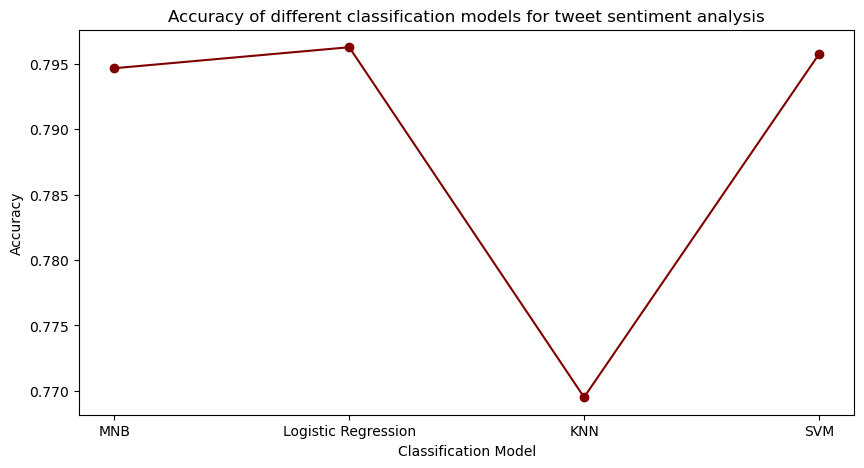

In [30]:
model = list(accuracy.keys())
acc = list(accuracy.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.plot(model, acc, color ='maroon',marker='o')
 
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of different classification models for tweet sentiment analysis")
plt.show()

In [31]:
print("Most accurate model for given data is", model[acc.index(max(acc))], "with accuracy =",max(acc))

Most accurate model for given data is Logistic Regression with accuracy = 0.7962566844919786


Made by Vivswaan Singh